In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
encoding = 'ISO-8859-1'
col_names = ['Sentiment', 'Twtter_Id', 'Date', 'Flag', 'UserName', 'Tweet']

#Non-Depressive Tweets
dataset = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding=encoding, names=col_names)
dataset = dataset[dataset['Sentiment'] == 4]
dataset = dataset[['Tweet','Sentiment']]
dataset['Sentiment'].replace(4, 0, inplace=True)
dataset = dataset.sample(15000, random_state=42)

In [3]:
dataset1 = pd.read_csv("C:/Users/bhuky/Desktop/FINAL_YEAR_PROJECT/Mental-Health-Twitter.csv",encoding=encoding)
dataset1.rename(columns={'post_text': 'Tweet', 'label': 'Sentiment'}, inplace=True)
dataset1 = dataset1[dataset1['Sentiment'] == 1]
dataset1 = dataset1[['Tweet','Sentiment']]
col_names = ['UserName','Tweet']
dataset2 = pd.read_csv('depressive_tweets_processed.csv', sep = '|', header = None, usecols = [4,5], nrows = 3200, names=col_names)
dataset2['Sentiment'] = 1;
dataset2 = dataset2[['Tweet','Sentiment']]


In [4]:
dataset1 = pd.concat([dataset1,dataset2])
dataset1 = dataset1.sample(frac = 1)
dataset1.reset_index(drop=True, inplace=True)
dataset = pd.concat([dataset,dataset1])
dataset = dataset.sample(frac = 1)
dataset.reset_index(drop=True, inplace=True)

In [5]:
df = dataset.copy()
df.reset_index(drop=True, inplace=True)
df.isnull()
df.dropna(inplace=True)


In [6]:
df.isnull().sum()

Tweet        0
Sentiment    0
dtype: int64

In [14]:
!pip install spacy
nltk.download('stopwords') 
nltk.download('punkt')

NameError: name 'nltk' is not defined

In [7]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


# Initialize WordNetLemmatizer and download stopwords if not already downloaded
lemmatizer = WordNetLemmatizer()

# Lemmatization function
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply the lemmatization function to the 'Tweets' column
df["Tweet"] = df["Tweet"].apply(lemmatize_text)


In [8]:
import re
import string
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}


def text_transformation(text):
    if isinstance(text, str):
        text = text.lower() #LOWER CASE
        text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in text.split(" ")])  
        text = re.sub('\[.*?\]', '', text) #REMOVES BRACKETS AND BTW THEM
        text = re.sub("\\W"," ",text) #REMOVES NON-WORDS
        text = re.sub('https?://\S+|www\.\S+', '', text) #REMOVES LINKS
        text = re.sub('<.*?>+', '', text) #REMOVES HTML TAGS
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #REMOVES PUNCUTATIONS
        text = re.sub('\n', '', text) #REMOVES NEW LINES
        text = re.sub('\w*\d\w*', '', text)  #REMOVES ALPHA NUMERICAL  
        text = re.sub(' +', ' ', text)  # Replace multiple spaces with a single space
    return text

df["Tweet"] = df["Tweet"].apply(lemmatize_text)
df["Tweet"] = df["Tweet"].apply(text_transformation)

In [9]:
import nltk
from nltk.corpus import stopwords

# Define a custom list of generalized stopwords
generalized_stopwords = [
    'i','' 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
    'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
    'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those',
    'a', 'an', 'at','the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to',
    'from', 'up', 'down', 'in', 'out', 'im','on', 'off', 'over', 'under', 'again',
    'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
    'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some',
    'such','only', 'own', 'same', 'so', 'than', 'too','https','twitter','tweet',
]


df["Tweet"] = df["Tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in generalized_stopwords))


In [11]:
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['Tweet']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 6).generate(word_cloud)
fig, ax = plt.subplots(figsize=(10, 5))
ax.add_patch(rect)
plt.imshow(wordcloud)


KeyboardInterrupt



In [ ]:
!pip install textblob
# Lemmatization (to group similar words together)
nltk.download("wordnet")
nltk.download("omw-1.4")

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

def performance_eval(clf, X_test, y_test):
    y_pred = clf.predict(X_test)

    print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
    
    print('   ------------ Classification Report -----------')
    print(classification_report(y_test, y_pred))
    
    print('   ------------ Confusion Matrix -------------- ')
    cm = confusion_matrix(y_test, y_pred)
    
    sns.set(rc={'figure.figsize':(10,6)})
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,cmap = "Blues",fmt='d', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
    plt.text(0.5, 0.4, f'True Negative ', ha='center', va='center',color='white')
    plt.text(0.5, 1.4, f'False Positive ', ha='center', va='center')
    plt.text(1.5, 0.4, f'False Negative ', ha='center', va='center')
    plt.text(1.5, 1.4, f'True Positive ', ha='center', va='center',color='white')

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

#    1. LOGISTIC REGRESSION

###         • Using Bag Of Words (CountVectorizer)

Logistic Regression (BOW)

Accuracy: 0.8929159802306426

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      2944
           1       0.94      0.82      0.88      2519

    accuracy                           0.89      5463
   macro avg       0.90      0.89      0.89      5463
weighted avg       0.90      0.89      0.89      5463

   ------------ Confusion Matrix -------------- 


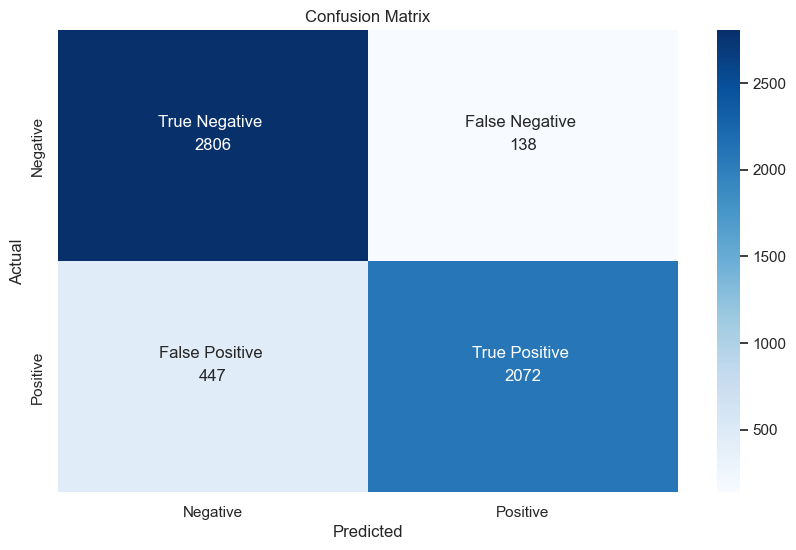

In [11]:
X = df['Tweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

count_vectorizer = CountVectorizer()
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Logistic Regression (BOW)\n")
performance_eval(lr,X_test,y_test)


###         • Using TF-IDF

Logistic Regression (TF-IDF)

Accuracy: 0.8855939959729087

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2965
           1       0.95      0.79      0.86      2498

    accuracy                           0.89      5463
   macro avg       0.90      0.88      0.88      5463
weighted avg       0.89      0.89      0.88      5463

   ------------ Confusion Matrix -------------- 


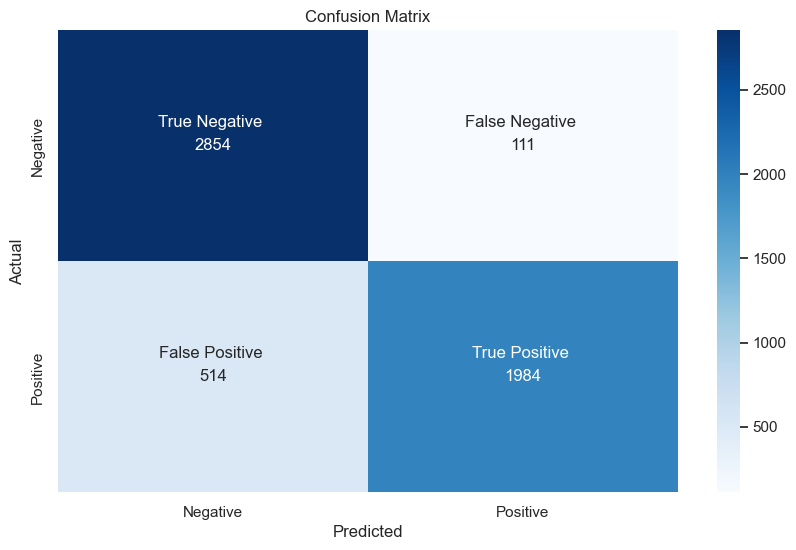

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
print("Logistic Regression (TF-IDF)\n")
performance_eval(lr,X_test_tfidf,y_test)

#    2. DECISION TREE

###         • Using Bag Of Words (CountVectorizer)

In [ ]:
X = df['Tweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

count_vectorizer = CountVectorizer()
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
print("Decision Tree (BOW)\n")
performance_eval(dt_classifier,X_test,y_test)

###         • Using TF-IDF

In [ ]:
X = df['Tweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_tfidf, y_train)
print("Decision Tree (TF-IDF)\n")
performance_eval(dt_classifier,X_test_tfidf,y_test)


#    3. RANDOM FOREST

In [ ]:
X = df['Tweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

count_vectorizer = CountVectorizer()
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
print("Random Forest (BOW)\n")
performance_eval(rf_classifier,X_test,y_test)

###         • Using TF-IDF

In [ ]:
X = df['Tweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)
print("Random Forest (TF-IDF)\n")
performance_eval(rf_classifier,X_test_tfidf,y_test)


In [12]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame with columns 'Tweet' and 'Sentiment'
X = df['Tweet']
y = df['Sentiment']

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to have consistent length
X_padded = pad_sequences(X_seq)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build the LSTM model
embedding_dim = 50  # You can adjust this based on your data
max_length = X_padded.shape[1]

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(100))  # You can adjust the number of LSTM units
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'LSTM Model Accuracy: {accuracy * 100:.2f}%')


Epoch 1/5
683/683 [==============================] - 78s 111ms/step - loss: 0.3321 - accuracy: 0.8629 - val_loss: 0.2473 - val_accuracy: 0.9063
Epoch 2/5
683/683 [==============================] - 72s 105ms/step - loss: 0.1477 - accuracy: 0.9454 - val_loss: 0.2462 - val_accuracy: 0.9028
Epoch 3/5
683/683 [==============================] - 72s 106ms/step - loss: 0.0754 - accuracy: 0.9727 - val_loss: 0.2931 - val_accuracy: 0.8885
Epoch 4/5
683/683 [==============================] - 73s 107ms/step - loss: 0.0492 - accuracy: 0.9827 - val_loss: 0.3451 - val_accuracy: 0.8850
Epoch 5/5
171/171 [==============================] - 6s 35ms/step - loss: 0.3570 - accuracy: 0.8938
LSTM Model Accuracy: 89.38%


In [24]:
pip install deap


                                              0.0/1.1 MB ? eta -:--:--
     -                                        0.0/1.1 MB 1.3 MB/s eta 0:00:01
     ---                                      0.1/1.1 MB 919.0 kB/s eta 0:00:02
     ----                                     0.1/1.1 MB 901.1 kB/s eta 0:00:02
     --------                                 0.2/1.1 MB 1.3 MB/s eta 0:00:01
     --------                                 0.2/1.1 MB 1.3 MB/s eta 0:00:01
     ---------                                0.3/1.1 MB 1.0 MB/s eta 0:00:01
     ---------                                0.3/1.1 MB 1.0 MB/s eta 0:00:01
     -----------                              0.3/1.1 MB 853.3 kB/s eta 0:00:01
     --------------                           0.4/1.1 MB 1.0 MB/s eta 0:00:01
     ----------------                         0.5/1.1 MB 972.0 kB/s eta 0:00:01
     -------------------                      0.5/1.1 MB 1.1 MB/s eta 0:00:01
     ---------------------                    0.6/1.1 MB 1.0 MB

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from deap import base, creator, tools, algorithms
import random

# Assume df is your dataframe with columns 'Tweet' and 'Sentiment'

# Feature extraction using Bag of Words
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['Tweet']).toarray()
y = df['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define genetic algorithm parameters
population_size = 100000
num_generations = 5000
crossover_prob = 0.7
mutation_prob = 0.6

# Create a fitness function
def evaluate(individual, X_train, y_train, X_test, y_test):
    selected_features = [bool(bit) for bit in individual]
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train[:, selected_features], y_train)
    y_pred = clf.predict(X_test[:, selected_features])
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,

# Define genetic algorithm parameters
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X[0]))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Initialize population
population = toolbox.population(n=population_size)

# Run the genetic algorithm
algorithms.eaSimple(population, toolbox, cxpb=crossover_prob, mutpb=mutation_prob, ngen=num_generations, stats=None, halloffame=None)

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
selected_features = [bool(bit) for bit in best_individual]

# Use the selected features in your model
final_X_train = X_train[:, selected_features]
final_X_test = X_test[:, selected_features]

# Train your model using the selected features
clf = DecisionTreeClassifier(random_state=42)
clf.fit(final_X_train, y_train)

# Evaluate the performance
performance_eval(clf, final_X_test, y_test)




KeyboardInterrupt: 

In [ ]:
# TEST

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from deap import base, creator, tools, algorithms
import random
from tqdm import tqdm  # Import tqdm for progress tracking

# Assume df is your dataframe with columns 'Tweet' and 'Sentiment'

# Feature extraction using Bag of Words
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['Tweet']).toarray()
y = df['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define genetic algorithm parameters
population_size = 1000
num_generations = 1
crossover_prob = 0.7
mutation_prob = 0.6

# Create a fitness function
def evaluate(individual, X_train, y_train, X_test, y_test):
    selected_features = [bool(bit) for bit in individual]
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train[:, selected_features], y_train)
    y_pred = clf.predict(X_test[:, selected_features])
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,

# Define genetic algorithm parameters
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X[0]))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Initialize population
population = toolbox.population(n=population_size)

# Run the genetic algorithm with tqdm progress tracking
for generation in tqdm(range(num_generations), desc='Genetic Algorithm Progress'):
    # Evaluate the population fitness
    fitness_values = list(map(toolbox.evaluate, population))
    
    # Update the fitness values for each individual
    for ind, fit in zip(population, fitness_values):
        ind.fitness.values = fit
        
    # Apply selection, crossover, and mutation
    offspring = algorithms.varAnd(population, toolbox, cxpb=crossover_prob, mutpb=mutation_prob)
    
    # Evaluate the new individuals
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
        
    # Replace the current population with the offspring
    population[:] = offspring

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
selected_features = [bool(bit) for bit in best_individual]

# Use the selected features in your model
final_X_train = X_train[:, selected_features]
final_X_test = X_test[:, selected_features]

# Train your model using the selected features
clf = DecisionTreeClassifier(random_state=42)
clf.fit(final_X_train, y_train)

# Evaluate the performance
performance_eval(clf, final_X_test, y_test)


C:\Users\bhuky\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\bhuky\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
Genetic Algorithm Progress:   0%|                                                                | 0/1 [00:00<?, ?it/s]

In [16]:
import random
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [17]:
# Assuming df is your DataFrame with 'Tweet' and 'Label' columns
X = df['Tweet']
y = df['Sentiment']

# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
def evaluate_features(individual, X_train, X_test, y_train, y_test):
    # Select features based on the chromosome
    selected_features = [feature for feature, selected in zip(X_train.columns, individual) if selected]
    
    # Create a bag-of-words representation using CountVectorizer
    vectorizer = CountVectorizer()
    X_train_transformed = vectorizer.fit_transform(X_train[selected_features])
    X_test_transformed = vectorizer.transform(X_test[selected_features])

    # Train a random forest classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_transformed, y_train)

    # Evaluate accuracy on the test set
    y_pred = clf.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [19]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X_train.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_features, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create an initial population
population = toolbox.population(n=50)


AttributeError: 'Series' object has no attribute 'columns'

In [20]:
# Number of generations
n_gen = 10
#X_test = X_test.to_frame()

# Run the genetic algorithm
algorithms.eaMuPlusLambda(population, toolbox, mu=50, lambda_=200, cxpb=0.7, mutpb=0.2, ngen=n_gen, stats=None, halloffame=None, verbose=True)


NameError: name 'population' is not defined

In [65]:
pip install tqdm


Note: you may need to restart the kernel to use updated packages.


In [69]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define your dataset and labels
X = df["Tweet"].values
y = df["Sentiment"].values

# Use CountVectorizer for text to convert it into a bag-of-words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Define the parameters
population_size = 20
num_generations = 10
crossover_prob = 0.9
mutation_prob = 0.1

# Define the classifier
clf = DecisionTreeClassifier()

# Function to initialize the population
def initialize_population():
    return np.random.choice([0, 1], size=(population_size, X.shape[1]))


# Function to evaluate the fitness of each individual
def evaluate_fitness(population):
    accuracies = []
    for features in population:
        selected_features = np.where(features == 1)[0]
        
        # Use selected features for training
        X_train, X_test, y_train, y_test = train_test_split(X[:, selected_features], y, test_size=0.2, random_state=42)
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    return np.array(accuracies)

# Function to perform crossover
def crossover(parent1, parent2):
    crossover_point = np.random.randint(0, len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Function to perform mutation
def mutate(individual):
    mutation_points = np.random.rand(len(individual)) < mutation_prob
    individual[mutation_points] = 1 - individual[mutation_points]
    return individual

# Main genetic algorithm loop
population = initialize_population()
for generation in range(num_generations):
    fitness_values = evaluate_fitness(population)
    
    # Select top individuals based on fitness
    selected_indices = np.argsort(fitness_values)[::-1][:int(population_size * 0.2)]
    selected_population = population[selected_indices]
    
    # Create new population through crossover and mutation
    new_population = []
    for _ in range(population_size // 2):
        parent1, parent2 = selected_population[np.random.choice(len(selected_population), size=2, replace=False)]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])
    
    population = np.array(new_population)

# Select the best individual from the final population
best_individual = population[np.argmax(evaluate_fitness(population))]

# Use the selected features for training the final model
selected_features = np.where(best_individual == 1)[0]
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X[:, selected_features], y, test_size=0.2, random_state=42)
final_model = DecisionTreeClassifier()
final_model.fit(X_train_final, y_train_final)

# Evaluate the final model
y_pred_final = final_model.predict(X_test_final)
accuracy_final = accuracy_score(y_test_final, y_pred_final)
print("Final Accuracy:", accuracy_final)


Final Accuracy: 0.841845140032949


In [13]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import random

# Define your dataset and labels
X = df["Tweet"].values
y = df["Sentiment"].values

# Use CountVectorizer for text to convert it into a bag-of-words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Define the parameters
population_size = 20
num_generations = 10
crossover_prob = 0.9
mutation_prob = 0.1

# Function to initialize the population
def initialize_population():
    return np.random.choice([0, 1], size=(population_size, X.shape[1]))

# Function to evaluate the fitness of each individual
def evaluate_fitness(population):
    accuracies = []
    for features in population:
        selected_features = np.where(features == 1)[0]
        
        # Use selected features for training
        X_train, X_test, y_train, y_test = train_test_split(X[:, selected_features], y, test_size=0.2, random_state=42)
        
        clf = DecisionTreeClassifier(random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    return np.array(accuracies)

# Function to perform crossover
def crossover(parent1, parent2):
    crossover_point = np.random.randint(0, len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Function to perform mutation
def mutate(individual):
    mutation_points = np.random.rand(len(individual)) < mutation_prob
    individual[mutation_points] = 1 - individual[mutation_points]
    return individual

# Main genetic algorithm loop
population = initialize_population()
for generation in range(num_generations):
    fitness_values = evaluate_fitness(population)
    
    # Select top individuals based on fitness
    selected_indices = np.argsort(fitness_values)[::-1][:int(population_size * 0.2)]
    selected_population = population[selected_indices]
    
    # Create new population through crossover and mutation
    new_population = []
    for _ in range(population_size // 2):
        parent1, parent2 = selected_population[np.random.choice(len(selected_population), size=2, replace=False)]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])
    
    population = np.array(new_population)

# Select the best individual from the final population
best_individual = population[np.argmax(evaluate_fitness(population))]

# Use the selected features for training the final model
selected_features = np.where(best_individual == 1)[0]
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X[:, selected_features], y, test_size=0.2, random_state=42)

# Try a Random Forest as the final model
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_final, y_train_final)

# Evaluate the final model using cross-validation
cv_accuracy = np.mean(cross_val_score(final_model, X_test_final, y_test_final, cv=5))
print("Cross-Validation Accuracy:", cv_accuracy)


Cross-Validation Accuracy: 0.8317769756928037


In [ ]:
#Word2Vec

#BiLSTM

#BERT

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import random

# Assume df is your dataframe with columns 'Tweet' and 'Sentiment'

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['Tweet']).toarray()
y = df['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameters
population_size = 20
num_generations = 10
crossover_prob = 0.9
mutation_prob = 0.1

# Function to initialize the population
def initialize_population():
    return np.random.choice([0, 1], size=(population_size, X.shape[1]))

# Function to evaluate the fitness of each individual
def evaluate_fitness(population):
    accuracies = []
    for features in population:
        selected_features = np.where(features == 1)[0]
        
        # Use selected features for training
        X_train, X_test, y_train, y_test = train_test_split(X[:, selected_features], y, test_size=0.2, random_state=42)
        
        clf = DecisionTreeClassifier(random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    return np.array(accuracies)

# Function to perform crossover
def crossover(parent1, parent2):
    crossover_point = np.random.randint(0, len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Function to perform mutation
def mutate(individual):
    mutation_points = np.random.rand(len(individual)) < mutation_prob
    individual[mutation_points] = 1 - individual[mutation_points]
    return individual

# Main genetic algorithm loop
population = initialize_population()
for generation in range(num_generations):
    fitness_values = evaluate_fitness(population)
    
    # Select top individuals based on fitness
    selected_indices = np.argsort(fitness_values)[::-1][:int(population_size * 0.2)]
    selected_population = population[selected_indices]
    
    # Create new population through crossover and mutation
    new_population = []
    for _ in range(population_size // 2):
        parent1, parent2 = selected_population[np.random.choice(len(selected_population), size=2, replace=False)]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])
    
    population = np.array(new_population)

# Select the best individual from the final population
best_individual = population[np.argmax(evaluate_fitness(population))]

# Use the selected features for training the final model
selected_features = np.where(best_individual == 1)[0]
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X[:, selected_features], y, test_size=0.2, random_state=42)

# Try a Random Forest as the final model
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_final, y_train_final)

# Evaluate the final model using cross-validation
cv_accuracy = np.mean(cross_val_score(final_model, X_test_final, y_test_final, cv=5))
print("Cross-Validation Accuracy:", cv_accuracy)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
from sklearn.model_selection import cross_val_score

# Assume df is your dataframe with columns 'Tweet' and 'Sentiment'

# Tokenize the tweets into words
tokenized_tweets = df['Tweet'].apply(lambda x: x.split())

# Train a Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_tweets, vector_size=100, window=5, min_count=1, workers=4)

# Feature extraction using Word2Vec
def vectorize_tweet(tweet):
    vector = np.zeros(word2vec_model.vector_size)
    count = 0
    for word in tweet:
        if word in word2vec_model.wv:
            vector += word2vec_model.wv[word]
            count += 1
    return vector / count if count != 0 else vector

X = np.vstack(tokenized_tweets.apply(vectorize_tweet))
y = df['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameters
population_size = 20
num_generations = 10
crossover_prob = 0.9
mutation_prob = 0.1

# Function to initialize the population
def initialize_population():
    return np.random.choice([0, 1], size=(population_size, X.shape[1]))

# Function to evaluate the fitness of each individual
def evaluate_fitness(population):
    accuracies = []
    for features in population:
        selected_features = np.where(features == 1)[0]
        
        # Use selected features for training
        X_train_selected, X_test_selected = X_train[:, selected_features], X_test[:, selected_features]
        
        clf = DecisionTreeClassifier(random_state=42)
        clf.fit(X_train_selected, y_train)
        y_pred = clf.predict(X_test_selected)
        
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    return np.array(accuracies)

# Function to perform crossover
def crossover(parent1, parent2):
    crossover_point = np.random.randint(0, len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Function to perform mutation
def mutate(individual):
    mutation_points = np.random.rand(len(individual)) < mutation_prob
    individual[mutation_points] = 1 - individual[mutation_points]
    return individual

# Main genetic algorithm loop
population = initialize_population()
for generation in range(num_generations):
    fitness_values = evaluate_fitness(population)
    
    # Select top individuals based on fitness
    selected_indices = np.argsort(fitness_values)[::-1][:int(population_size * 0.2)]
    selected_population = population[selected_indices]
    
    # Create new population through crossover and mutation
    new_population = []
    for _ in range(population_size // 2):
        parent1, parent2 = selected_population[np.random.choice(len(selected_population), size=2, replace=False)]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])
    
    population = np.array(new_population)

# Select the best individual from the final population
best_individual = population[np.argmax(evaluate_fitness(population))]

# Use the selected features for training the final model
selected_features = np.where(best_individual == 1)[0]
X_train_final, X_test_final = X_train[:, selected_features], X_test[:, selected_features]

# Try a Random Forest as the final model
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_final, y_train)

# Evaluate the final model using cross-validation
cv_accuracy = np.mean(cross_val_score(final_model, X_test_final, y_test, cv=5))
print("Cross-Validation Accuracy:", cv_accuracy)


In [14]:
pip install transformers torch

                                              0.0/198.6 MB ? eta -:--:--
                                              0.0/198.6 MB 1.3 MB/s eta 0:02:36
                                            0.0/198.6 MB 487.6 kB/s eta 0:06:48
                                            0.1/198.6 MB 930.9 kB/s eta 0:03:34
                                              0.2/198.6 MB 1.1 MB/s eta 0:03:06
                                              0.3/198.6 MB 1.2 MB/s eta 0:02:44
                                              0.3/198.6 MB 1.2 MB/s eta 0:02:44
                                              0.3/198.6 MB 1.0 MB/s eta 0:03:10
                                              0.4/198.6 MB 1.1 MB/s eta 0:03:00
                                              0.5/198.6 MB 1.1 MB/s eta 0:02:55
                                              0.5/198.6 MB 1.2 MB/s eta 0:02:52
                                              0.6/198.6 MB 1.2 MB/s eta 0:02:44
                                              0

     --------------------------           145.2/198.6 MB 624.7 kB/s eta 0:01:26
     --------------------------           145.3/198.6 MB 624.7 kB/s eta 0:01:26
     --------------------------           145.3/198.6 MB 622.3 kB/s eta 0:01:26
     --------------------------           145.3/198.6 MB 620.6 kB/s eta 0:01:26
     --------------------------           145.4/198.6 MB 620.6 kB/s eta 0:01:26
     --------------------------           145.4/198.6 MB 620.0 kB/s eta 0:01:26
     --------------------------           145.4/198.6 MB 620.0 kB/s eta 0:01:26
     --------------------------           145.4/198.6 MB 620.0 kB/s eta 0:01:26
     --------------------------           145.4/198.6 MB 620.0 kB/s eta 0:01:26
     --------------------------           145.4/198.6 MB 620.0 kB/s eta 0:01:26
     --------------------------           145.4/198.6 MB 620.0 kB/s eta 0:01:26
     --------------------------           145.4/198.6 MB 620.0 kB/s eta 0:01:26
     --------------------------         

In [23]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm  # Import tqdm for the progress bar

# Load the dataset
# Assume df is your dataframe with columns 'Tweet' and 'Sentiment'
X = df['Tweet'].values
y = df['Sentiment'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize and preprocess the data
def preprocess_data(texts, labels):
    input_ids = []
    attention_masks = []

    for text in tqdm(texts, desc="Tokenizing and Preprocessing"):
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )

        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    labels = torch.tensor(labels)

    return TensorDataset(input_ids, attention_masks, labels)

# Preprocess the training and testing data
train_dataset = preprocess_data(X_train, y_train)
test_dataset = preprocess_data(X_test, y_test)

# Set up DataLoader
batch_size = 8
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Set up optimizer and training parameters
optimizer = AdamW(model.parameters(), lr=2e-5)
epochs = 3

# Training loop
for epoch in range(epochs):
    model.train()

    for batch in tqdm(train_dataloader, desc=f"Epoch {epoch + 1}/{epochs}"):
        optimizer.zero_grad()

        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
predictions = []

for batch in tqdm(test_dataloader, desc="Evaluating"):
    input_ids, attention_mask, labels = batch
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predictions.extend(torch.argmax(logits, dim=1).tolist())

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("BERT Accuracy:", accuracy)


Tokenizing and Preprocessing:   0%|                                                          | 0/21850 [00:00<?, ?it/s]


TypeError: BertTokenizer._tokenize() got an unexpected keyword argument 'padding'